## Regression between atmospheric contribution to SLH and AMV using observational data

In this notebook a regression is performed between the atmospheric contribution to sea level rise at the Dutch coast as has been calculated using three different regression models (Nearest point, Timmerman and Dangendorf). These models show a contribution to sea level rise at the Dutch coast which is varying over time. The aim of regressing this to the AMV is to understand the relation between the varying contribution of wind to sea level rise and the AMV.


As a low pass filter, to both datasets the LOWESS method is applied. 




In [173]:
import matplotlib.pyplot as plt
import matplotlib

In [174]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/AMV/code')

import import_data as imprt
import regression as regr
import figures as fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import and plot wind contribution to sea level data

The annual data has been detrended

In [175]:
df_era5, df_20cr = imprt.import_obs_ac_slh_data()


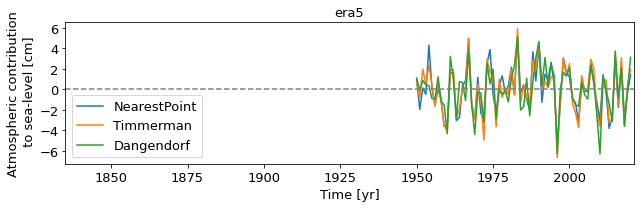

In [176]:
fig.plot_df_timeseries(df_era5, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')


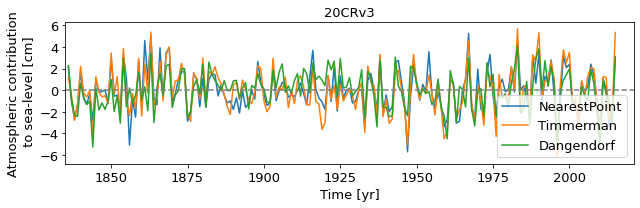

In [177]:
fig.plot_df_timeseries(df_20cr, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')



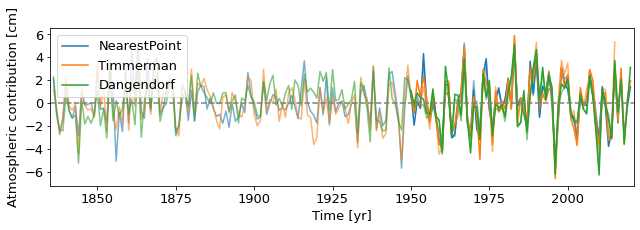

In [178]:
fig.plot_era5_20cr_timeseries(df_era5, df_20cr)

### Import and plot AMV data

There are three observational SST products: HadiSST, COBE and ERSST
whereof the deseasonalized, detrended data is imported

In [179]:
AMV_data = imprt.import_obs_AMV_data()

In [180]:
AMV_data

,HadISSTv2,ERSSTv5,COBE-SST2
time,,,
1870,-0.064876,0.135647,-0.022205
1871,-0.090710,0.052964,-0.095801
1872,-0.120943,-0.068072,-0.156010
1873,-0.197644,-0.010218,-0.179611
1874,-0.190010,0.059488,-0.152831
...,...,...,...
2014,-0.133286,-0.131023,-0.137060
2015,-0.127954,-0.094863,-0.153978
2016,-0.002434,0.068500,0.020099


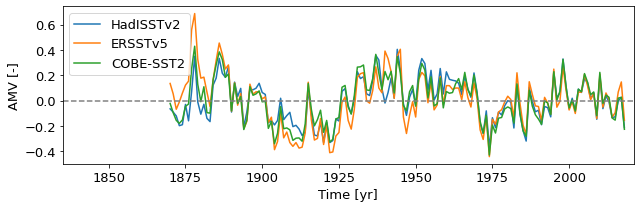

In [181]:
fig.plot_df_timeseries(AMV_data, ylabel = 'AMV [-]', title = '')



### Perform regression for 21y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 21 y window

In [182]:
df_era5_21, df_20cr_21 = imprt.import_obs_ac_slh_data(smoothed = True)
AMV_data_21 = imprt.import_obs_AMV_data(smoothed = True)

#### Plot regression input

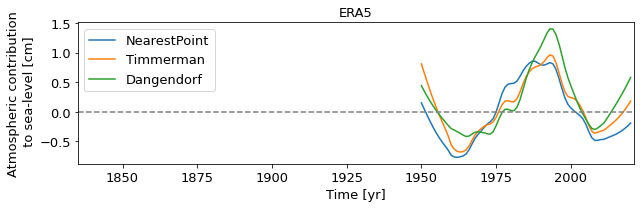

In [183]:
fig.plot_df_timeseries(df_era5_21, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5')


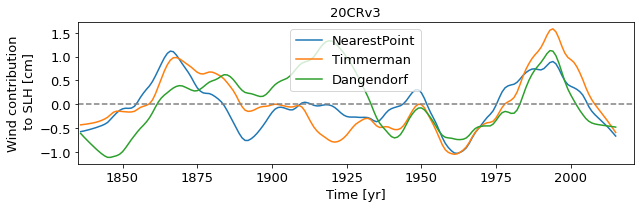

In [184]:
fig.plot_df_timeseries(df_20cr_21, ylabel = 'Wind contribution\n to SLH [cm]', title = '20CRv3')



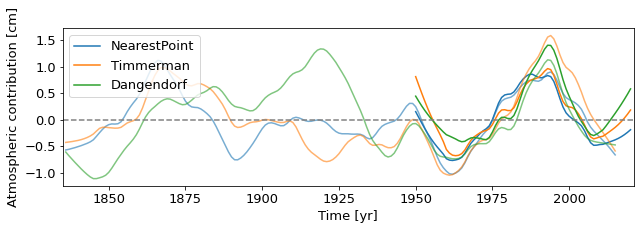

In [185]:
fig.plot_era5_20cr_timeseries(df_era5_21, df_20cr_21)

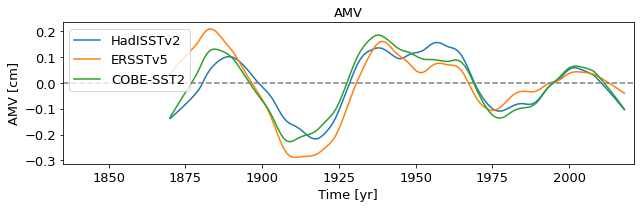

In [186]:
fig.plot_df_timeseries(AMV_data_21, ylabel = 'AMV [cm]', title = 'AMV')



#### Perform regression

In [187]:
results_era5_21, timeseries_era5_21 = regr.lagged_regression(AMV_data_21, df_era5_21)
results_20cr_21, timeseries_20cr_21 = regr.lagged_regression(AMV_data_21, df_20cr_21)

#### Show regression results

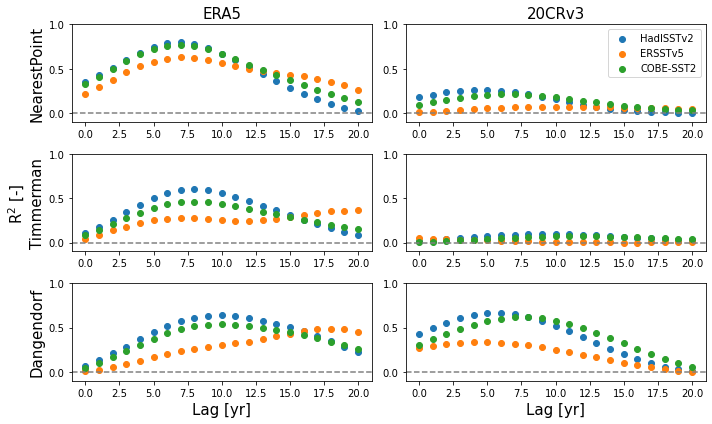

In [188]:
fig.plot_result(results_era5_21, results_20cr_21, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

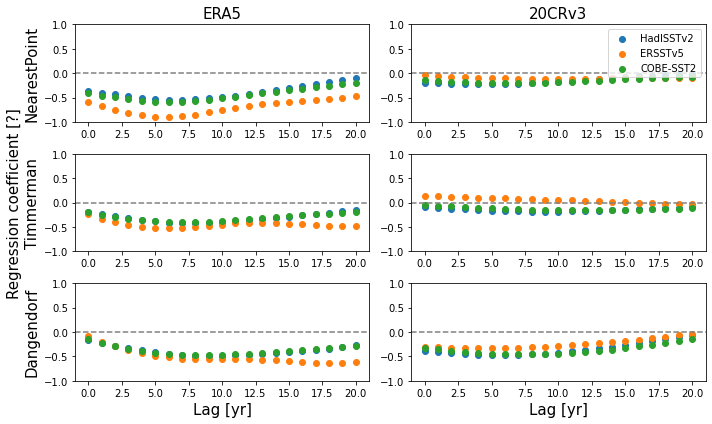

In [189]:
fig.plot_result(results_era5_21, results_20cr_21, 'coef', 'Regression coefficient [?]', ymin = -1, ymax = 1)

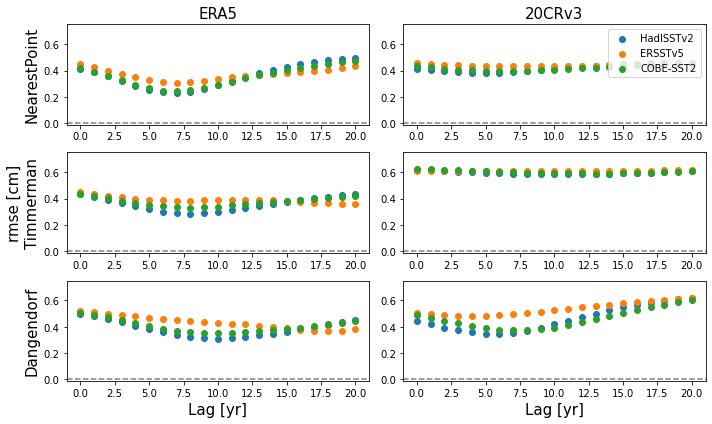

In [190]:
fig.plot_result(results_era5_21, results_20cr_21, 'rmse', 'rmse [cm]', ymin = -0.01, ymax = 0.75)

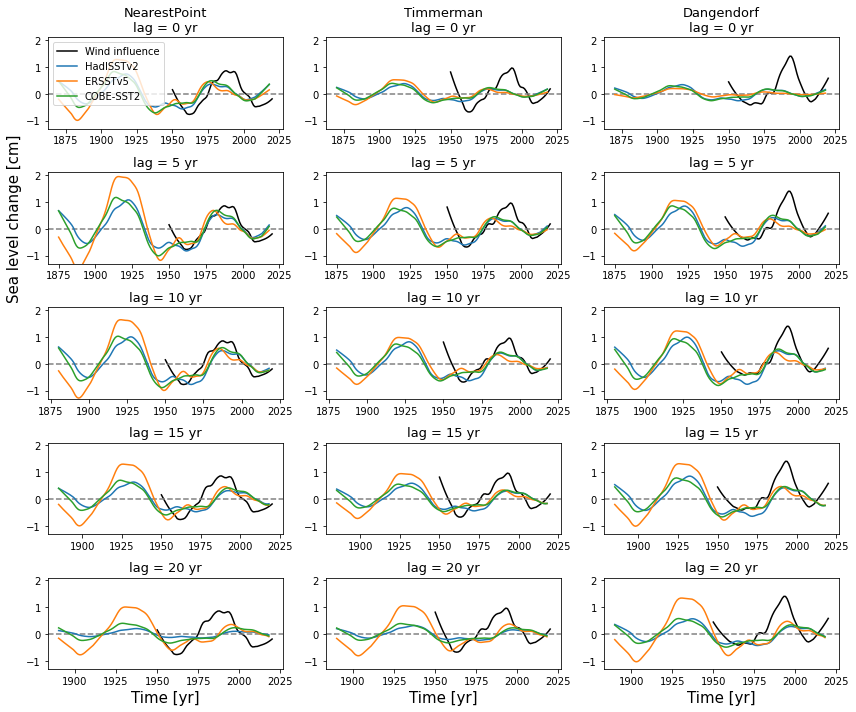

In [191]:
fig.plot_timeseries(timeseries_era5_21, df_era5_21, [0, 5, 10, 15, 20], data_type='era5', ymin= -1.3, ymax = 2.1)

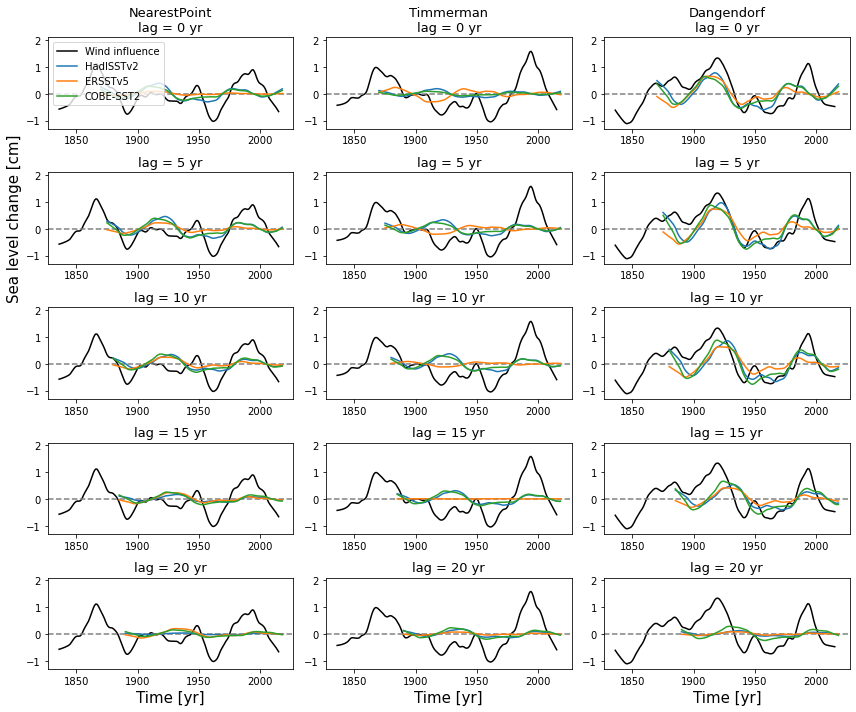

In [192]:
fig.plot_timeseries(timeseries_20cr_21, df_20cr_21, [0, 5, 10, 15, 20], data_type='20cr', ymin= -1.3, ymax = 2.1)

#### Create barplot of preferred lags

In [193]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_21[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_21[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [194]:
lag_df.T

lag                            lag
ERA5   NearestPoint HadISSTv2    7
                    ERSSTv5      7
                    COBE-SST2    7
       Timmerman    HadISSTv2    8
                    ERSSTv5     20
                    COBE-SST2    8
       Dangendorf   HadISSTv2   10
                    ERSSTv5     18
                    COBE-SST2   10
20CRv3 NearestPoint HadISSTv2    5
                    ERSSTv5      9
                    COBE-SST2    7
       Timmerman    HadISSTv2    9
                    ERSSTv5      0
                    COBE-SST2   12
       Dangendorf   HadISSTv2    6
                    ERSSTv5      5
                    COBE-SST2    8

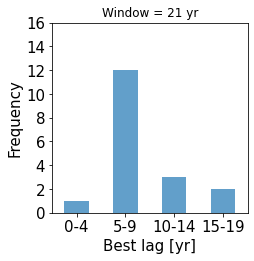

In [195]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[1,12,3,2]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(0,16)
plt.title('Window = 21 yr')
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/barplot_21', 
                bbox_inches = 'tight', dpi = 500)

### Perform regression for 31y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 31 y window

In [196]:
df_era5_31, df_20cr_31 = imprt.import_obs_ac_slh_data(smoothed = True, window = 31)
AMV_data_31 = imprt.import_obs_AMV_data(smoothed = True, window = 31)

#### Plot regression input

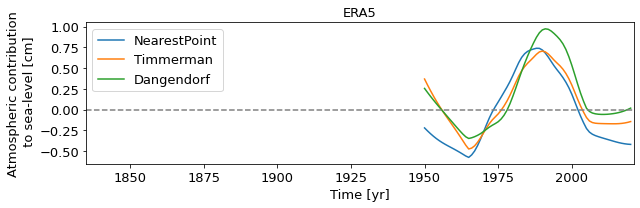

In [197]:
fig.plot_df_timeseries(df_era5_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 31)


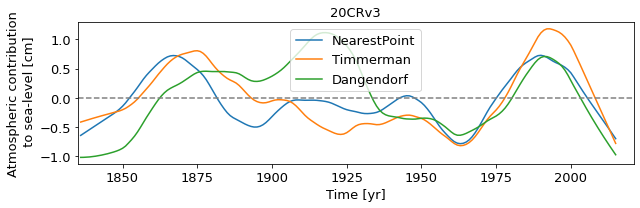

In [198]:
fig.plot_df_timeseries(df_20cr_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 31)



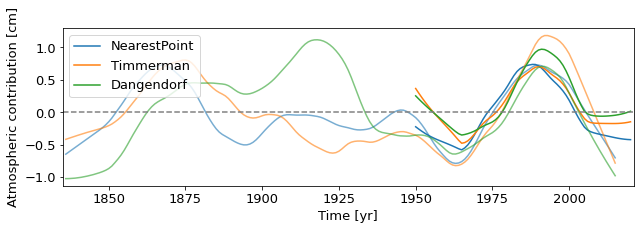

In [199]:
fig.plot_era5_20cr_timeseries(df_era5_31, df_20cr_31, window = 31)

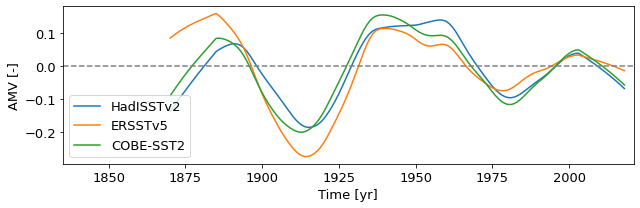

In [200]:
fig.plot_df_timeseries(AMV_data_31, ylabel = 'AMV [-]', title = '', window = 31)



In [201]:
AMV_data_31

,HadISSTv2,ERSSTv5,COBE-SST2
time,,,
1870,-0.137873,0.084242,-0.090635
1871,-0.124937,0.091402,-0.076886
1872,-0.112020,0.098217,-0.063425
1873,-0.099163,0.104638,-0.050306
1874,-0.086408,0.110645,-0.037568
...,...,...,...
2014,-0.035426,0.000906,-0.024371
2015,-0.043376,-0.002716,-0.032295
2016,-0.051544,-0.006479,-0.040482


#### Perform regression

In [202]:
results_era5_31, timeseries_era5_31 = regr.lagged_regression(AMV_data_31, df_era5_31)
results_20cr_31, timeseries_20cr_31 = regr.lagged_regression(AMV_data_31, df_20cr_31)

In [203]:
results_20cr_31.swaplevel(0,2, axis=1)[0]

,NearestPoint,Timmerman,Dangendorf,NearestPoint,Timmerman,Dangendorf,NearestPoint,Timmerman,Dangendorf
,HadISSTv2,HadISSTv2,HadISSTv2,ERSSTv5,ERSSTv5,ERSSTv5,COBE-SST2,COBE-SST2,COBE-SST2
result,,,,,,,,,
rmse,0.358688,0.553045,0.394244,0.393911,0.545968,0.452994,0.376975,0.561307,0.432058
r$^2$,0.171315,0.041651,0.448442,0.000570,0.066019,0.271809,0.084659,0.012803,0.337565
constant,-0.062892,-0.022249,0.160932,-0.064873,-0.023716,0.156724,-0.063852,-0.023081,0.159362
coef,-0.162040,-0.114555,-0.353204,-0.009314,0.143689,-0.273962,-0.113717,-0.063404,-0.305926


In [204]:
results_20cr_31.swaplevel(0,2, axis=1)[4, 'Dangendorf']

/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2901: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


,HadISSTv2,ERSSTv5,COBE-SST2
result,,,
rmse,0.320323,0.433873,0.349659
r$^2$,0.644829,0.348392,0.576796
constant,0.160632,0.151254,0.157229
coef,-0.423489,-0.309754,-0.399486


#### Show regression results

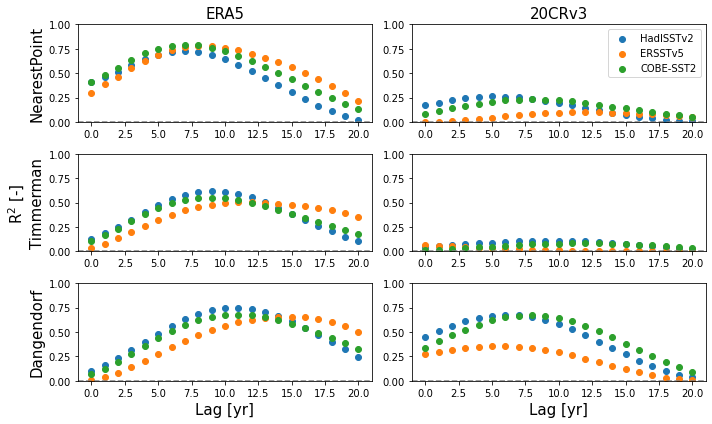

In [205]:
fig.plot_result(results_era5_31, results_20cr_31, 'r$^2$', 'R$^2$ [-]', ymin = 0.0, ymax = 1.0, window = 31)

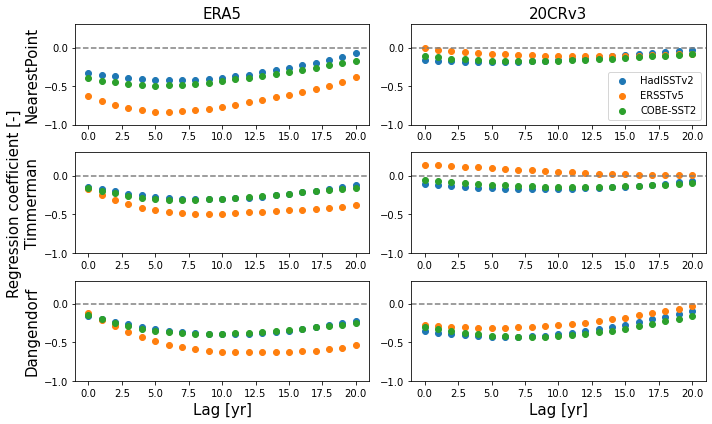

In [206]:
fig.plot_result(results_era5_31, results_20cr_31, 'coef', 'Regression coefficient [-]', ymin = -1, ymax = 0.3, window = 31, location = 'lower right')

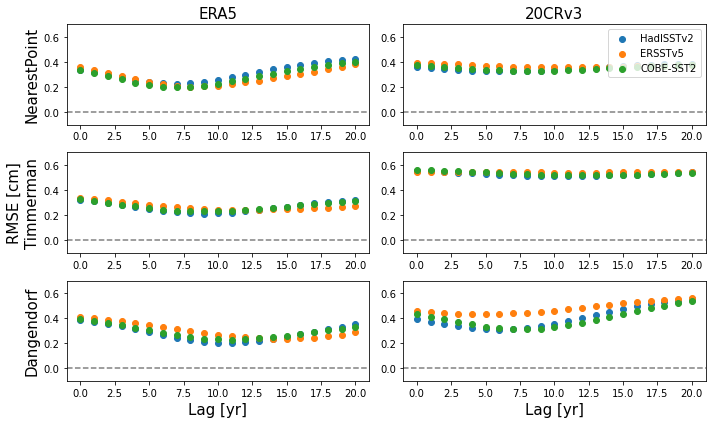

In [207]:
fig.plot_result(results_era5_31, results_20cr_31, 'rmse', 'RMSE [cm]', ymin = -0.1, ymax = 0.7, window = 31)

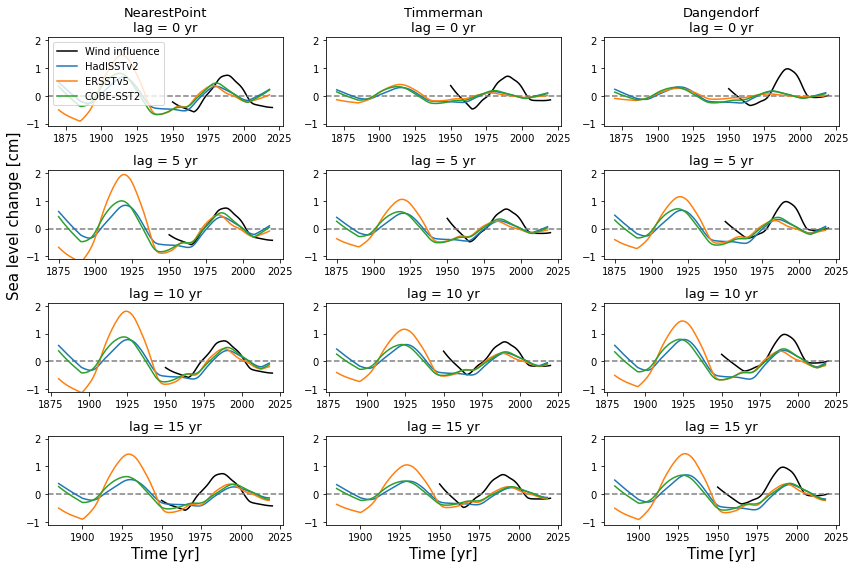

In [208]:
fig.plot_timeseries(timeseries_era5_31, df_era5_31, [0, 5, 10, 15], data_type='era5', window = 31)

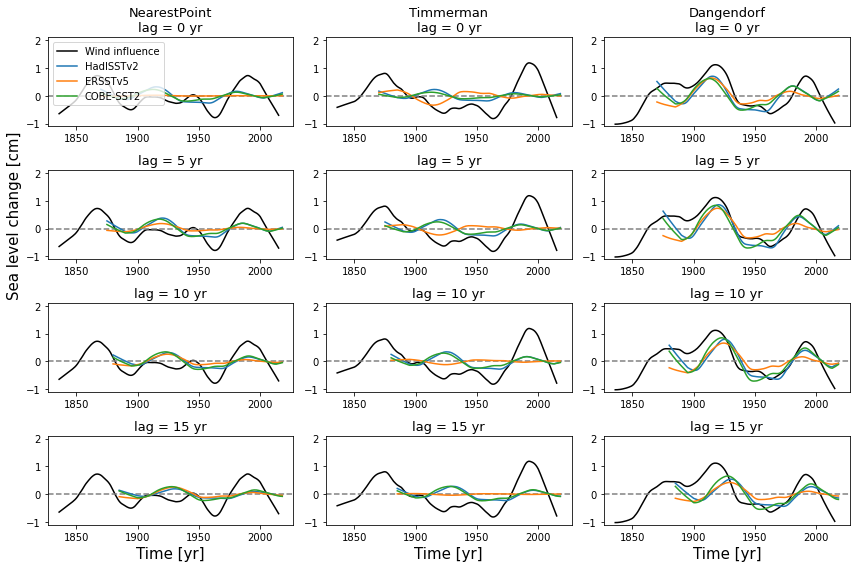

In [209]:
fig.plot_timeseries(timeseries_20cr_31, df_20cr_31, [0, 5, 10, 15], data_type='20cr', window = 31)

In [210]:
def plot_timeseries2(timeseries, data, lags, data_type, window = 21, ymin = -1.1, ymax = 2.1):
    
    
    n_row = len(lags)
    n_col = 1
    fsize = 15
    
    AMV_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']
    
    fig, axs = plt.subplots(n_row, n_col, figsize = (9,2*n_row))
    
    
    for i in range(n_row):
            
            
        ax = axs[i]
        ax.set_ylim(ymin,ymax)
        ax.plot(data.index, data['Dangendorf'].values, color = 'gray', label = 'Wind-driven sea\n level variability')
        ax.axhline(color='grey', linestyle='--')  
            
        for name in AMV_names:
            ts = timeseries[name, lags[i]]
            ax.plot(ts.index, ts.values, label = name)
                
        if i == 1:        
            ax.set_ylabel('AMV contribution [cm]', fontsize=fsize)
        if i ==0:
            ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), fontsize = fsize)
                
        if i == 0:
            ax.set_title(f'Dangendorf\n lag = {lags[i]} yr', fontsize=fsize) 
        else:
            ax.set_title(f'lag = {lags[i]} yr', fontsize=fsize) 
                
        if i == n_row-1:
            ax.set_xlabel('Time [yr]', fontsize=fsize)
    plt.tight_layout()
    
    
    plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/timeseries_{data_type}_window{window}_dang', dpi = 500)
    

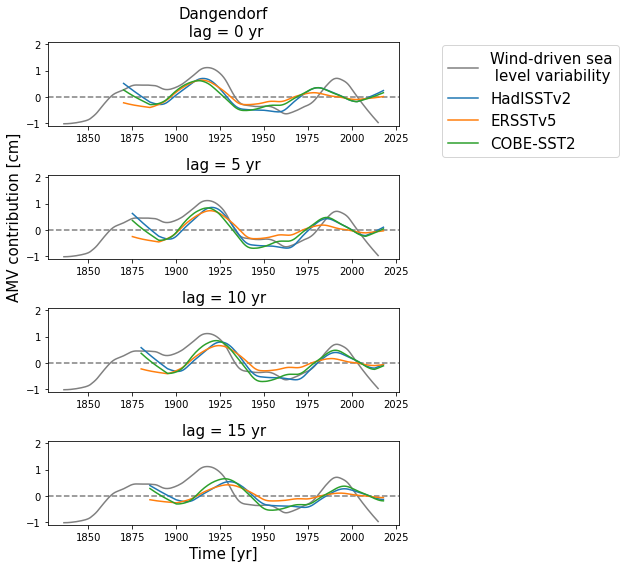

In [211]:
plot_timeseries2(timeseries_20cr_31.swaplevel(0,1, axis=1)['Dangendorf'], df_20cr_31, [0, 5, 10, 15], data_type='20cr', window = 31, ymin = -1.1, ymax = 2.1)

In [212]:
df_20cr_31

,NearestPoint,Timmerman,Dangendorf
time,,,
1836,-0.643705,-0.414913,-1.020250
1837,-0.610009,-0.398915,-1.019528
1838,-0.575862,-0.382940,-1.016879
1839,-0.541686,-0.367326,-1.012653
1840,-0.507584,-0.352070,-1.006976
...,...,...,...
2011,-0.403163,-0.324935,-0.669602
2012,-0.476345,-0.438131,-0.748113
2013,-0.550111,-0.551682,-0.825058


#### Create barplot of preferred lags

In [213]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_31[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_31[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [214]:
lag_df.T

lag                            lag
ERA5   NearestPoint HadISSTv2    7
                    ERSSTv5      8
                    COBE-SST2    7
       Timmerman    HadISSTv2    9
                    ERSSTv5     11
                    COBE-SST2    9
       Dangendorf   HadISSTv2   11
                    ERSSTv5     15
                    COBE-SST2   11
20CRv3 NearestPoint HadISSTv2    5
                    ERSSTv5     12
                    COBE-SST2    8
       Timmerman    HadISSTv2    9
                    ERSSTv5      0
                    COBE-SST2   12
       Dangendorf   HadISSTv2    6
                    ERSSTv5      5
                    COBE-SST2    8

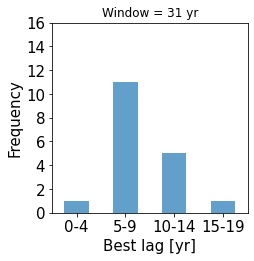

In [215]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[1,11,5,1]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(0,16)
plt.title('Window = 31 yr')
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/barplot_31', 
                bbox_inches = 'tight', dpi = 500)

### Perform regression for 11y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 11 y window

In [216]:
df_era5_11, df_20cr_11 = imprt.import_obs_ac_slh_data(smoothed = True, window = 11)
AMV_data_11 = imprt.import_obs_AMV_data(smoothed = True, window = 11)

#### Plot regression input

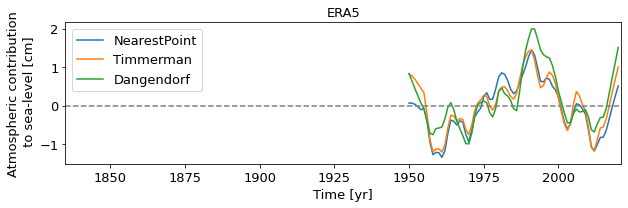

In [217]:
fig.plot_df_timeseries(df_era5_11, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 11)


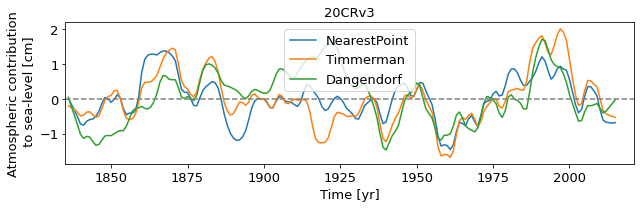

In [218]:
fig.plot_df_timeseries(df_20cr_11, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 11)



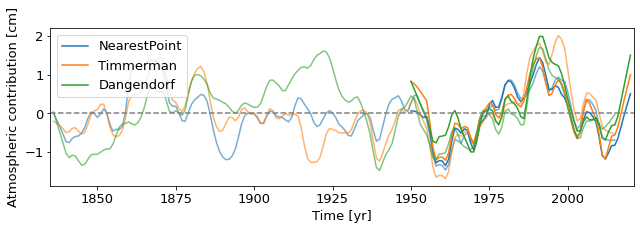

In [219]:
fig.plot_era5_20cr_timeseries(df_era5_11, df_20cr_11, window = 11)

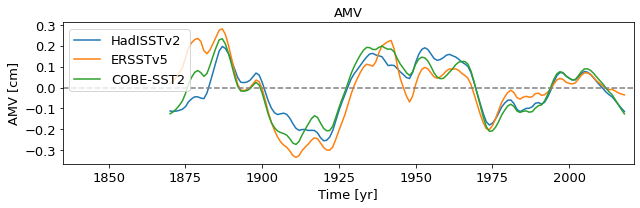

In [220]:
fig.plot_df_timeseries(AMV_data_11, ylabel = 'AMV [cm]', title = 'AMV', window = 11)



#### Perform regression

In [221]:
results_era5_11, timeseries_era5_11 = regr.lagged_regression(AMV_data_11, df_era5_11)
results_20cr_11, timeseries_20cr_11 = regr.lagged_regression(AMV_data_11, df_20cr_11)

#### Show regression results

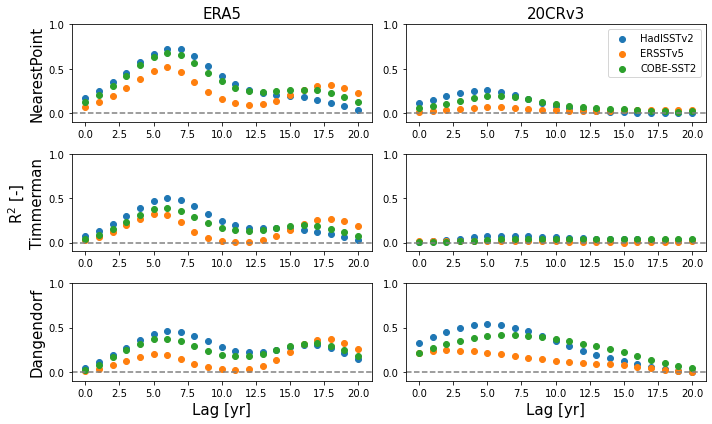

In [222]:
fig.plot_result(results_era5_11, results_20cr_11, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0, window = 11)

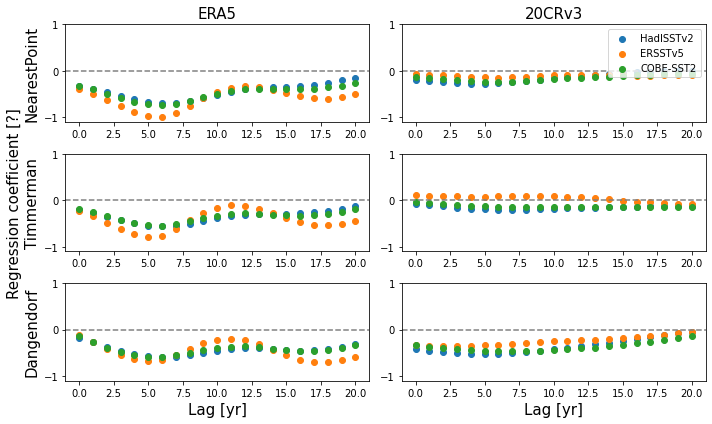

In [223]:
fig.plot_result(results_era5_11, results_20cr_11, 'coef', 'Regression coefficient [?]', ymin = -1.1, ymax = 1, window = 11)

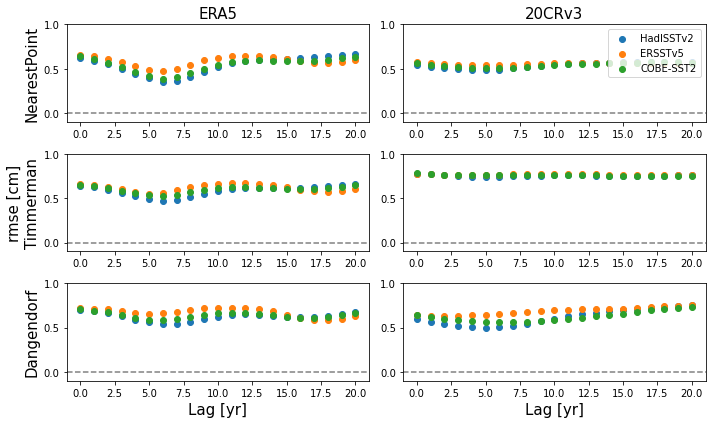

In [224]:
fig.plot_result(results_era5_11, results_20cr_11, 'rmse', 'rmse [cm]', ymin = -0.1, ymax = 1, window = 11)

#### Create barplot of preferred lags

In [225]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_11[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_11[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [226]:
lag_df.T

lag                            lag
ERA5   NearestPoint HadISSTv2    6
                    ERSSTv5      6
                    COBE-SST2    6
       Timmerman    HadISSTv2    6
                    ERSSTv5      5
                    COBE-SST2    6
       Dangendorf   HadISSTv2    6
                    ERSSTv5     18
                    COBE-SST2    6
20CRv3 NearestPoint HadISSTv2    5
                    ERSSTv5      6
                    COBE-SST2    6
       Timmerman    HadISSTv2    7
                    ERSSTv5      0
                    COBE-SST2    9
       Dangendorf   HadISSTv2    5
                    ERSSTv5      2
                    COBE-SST2    7

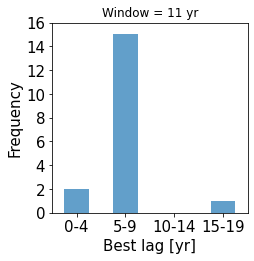

In [227]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[2,15,0,1]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.ylim(0,16)
plt.yticks(size = 15)
plt.title('Window = 11 yr')
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/barplot_11', 
                bbox_inches = 'tight', dpi = 500)

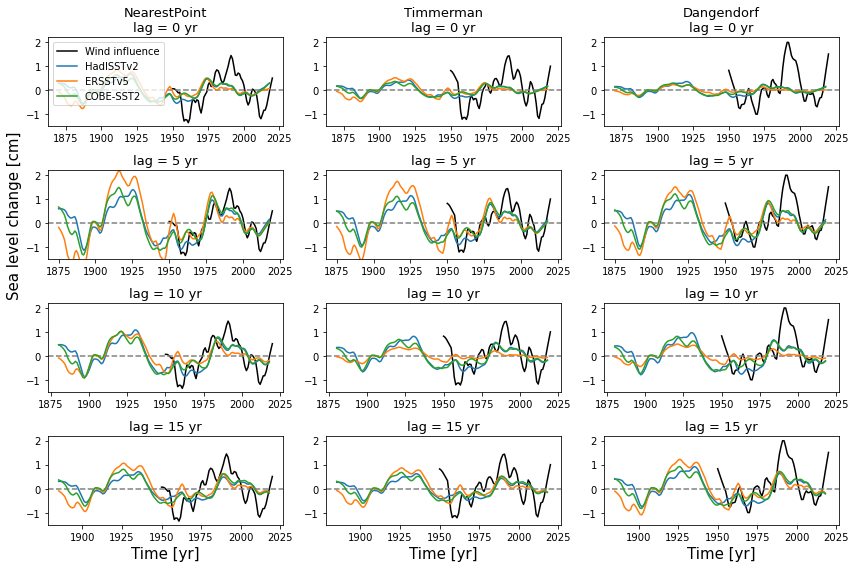

In [230]:
fig.plot_timeseries(timeseries_era5_11, df_era5_11, [0, 5, 10, 15], data_type='era5', window = 11, ymin= -1.5, ymax = 2.2)

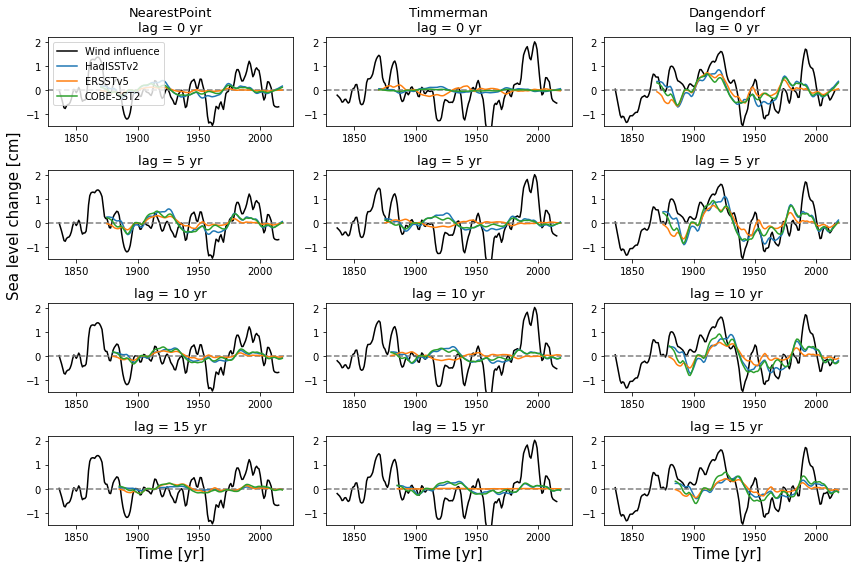

In [231]:
fig.plot_timeseries(timeseries_20cr_11, df_20cr_11, [0, 5, 10, 15], data_type='20cr', window = 11, ymin= -1.5, ymax = 2.2)

### Perform regression for 41y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 41 y window

In [ ]:
df_era5_41, df_20cr_41 = imprt.import_obs_ac_slh_data(smoothed = True, window = 41)
AMV_data_41 = imprt.import_obs_AMV_data(smoothed = True, window = 41)

#### Plot regression input

In [ ]:
fig.plot_df_timeseries(df_era5_41, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 41)


In [ ]:
fig.plot_df_timeseries(df_20cr_41, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 41)



In [ ]:
fig.plot_era5_20cr_timeseries(df_era5_41, df_20cr_41, window = 41)

In [ ]:
fig.plot_df_timeseries(AMV_data_41, ylabel = 'AMV [cm]', title = 'AMV', window = 41)



#### Perform regression

In [ ]:
results_era5_41, timeseries_era5_41 = regr.lagged_regression(AMV_data_41, df_era5_41)
results_20cr_41, timeseries_20cr_41 = regr.lagged_regression(AMV_data_41, df_20cr_41)

#### Show regression results

In [ ]:
fig.plot_result(results_era5_41, results_20cr_41, 'r$^2$', 'R$^2$ [-]', ymin=-0.1, ymax = 1.0, window = 41)

In [ ]:
fig.plot_result(results_era5_41, results_20cr_41, 'coef', 'Regression coefficient', ymin = -1, ymax = 0.7, window = 41)

In [ ]:
fig.plot_result(results_era5_41, results_20cr_41, 'rmse', 'rmse [cm]', ymin = -0.1, ymax = 0.7, window = 41)

In [ ]:
fig.plot_timeseries(timeseries_era5_41, df_era5_41, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='era5', window = 41, ymin= -1.1, ymax = 2)

In [ ]:
fig.plot_timeseries(timeseries_20cr_41, df_20cr_41, [0, 5, 10, 15, 20, 25, 30, 35, 40], data_type='20cr', window = 41, ymin= -1.1, ymax = 2)